# Homework 6 - Olivier Gilbert - 30/11/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.units as u
from astropy.constants import M_jup, M_sun, G

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.rc("axes", labelsize=16) 

## 1.

### a)
I decided to add the columns for the discovery method, including only astrometry, radial velocity, direct imaging, transits,
and microlensing, as they are the only methods we're interested in.

In [5]:
df = pd.read_csv(r"PSCompPars_2025.11.30_08.48.21.csv", skiprows=124)
df = df[df["discoverymethod"].isin(["Radial Velocity","Imaging","Microlensing","Transit","Astrometry"])]
print(df["discoverymethod"].unique())
for col in df.columns:
    if col.startswith("pl") and col.__contains__("mass"):
        print(col) # print the keys to access the mass in Earth masses or Jupiter masses


['Radial Velocity' 'Imaging' 'Microlensing' 'Transit' 'Astrometry']
pl_bmasse
pl_bmasseerr1
pl_bmasseerr2
pl_bmasselim
pl_bmassj
pl_bmassjerr1
pl_bmassjerr2
pl_bmassjlim
pl_bmassprov


### b)

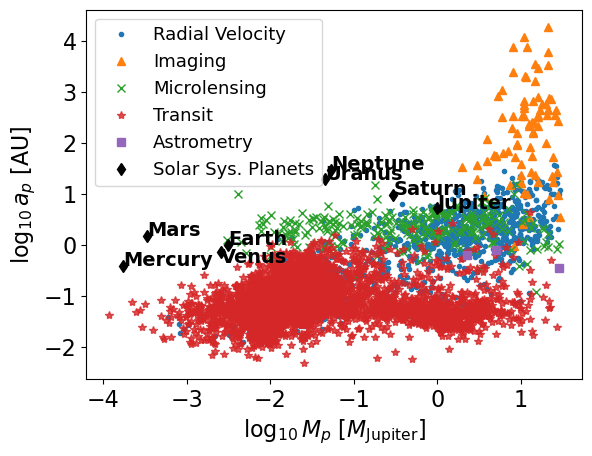

In [ ]:
symbols = [".","^","x","*","s"]
for i,detection_method in enumerate(df["discoverymethod"].unique()):
    sub_df = df[df["discoverymethod"] == detection_method]
    pl_masses = sub_df["pl_bmassj"]
    pl_semi_major_axis = sub_df["pl_orbsmax"]

    plt.plot(np.log10(pl_masses), np.log10(pl_semi_major_axis), ls="None", marker=symbols[i], alpha=(1 if detection_method!="Transit" else 0.8), label=detection_method)

planets = [
    "Mercury", "Venus", "Earth", "Mars",
    "Jupiter", "Saturn", "Uranus", "Neptune"
]
masses_kg = [
    3.3011e23,
    4.8675e24,
    5.97237e24,
    6.4171e23,
    1.89813e27,
    5.6834e26,
    8.6810e25,
    1.02413e26
]
masses_M_jup = (np.array(masses_kg)/M_jup).value
a_AU = [
    0.387098,
    0.723332,
    1.00000011,
    1.523679,
    5.20260,
    9.5549,
    19.2184,
    30.11
]
for i, planet in enumerate(planets):
    plt.plot(np.log10(masses_M_jup[i]), np.log10(a_AU[i]), marker="d", color="black", ls="None", label=(None if i!=0 else "Solar Sys. Planets"))
    plt.text(np.log10(masses_M_jup[i]), np.log10(a_AU[i])+(0 if planet!="Venus" else -0.2), planet, fontsize=14, fontweight="bold")


plt.xlabel(r"$\log_{10}M_p$ [$M_\mathrm{Jupiter}$]")
plt.ylabel(r"$\log_{10}a_p$ [AU]")
plt.legend(fontsize=13)
plt.show()

### c)

The expression for the astrometric signal is:
$$\theta_\star = \frac{M_p}{M_\star}\frac{a_p}{d}$$

For a wobble of 10 micro-arcsec for a Sun-like star at $d\sim10\mathrm{pc}$, this becomes
$$10\mathrm{mas} = \frac{M_p}{M_\odot}\frac{a_p}{10\mathrm{pc}}$$
$$a_p = \left(\frac{M_p}{M_\odot}\right)^{-1}\cdot 10\mathrm{\mu as} \cdot 10\mathrm{pc}$$
$$a_p = \left(\frac{M_p}{M_\odot}\right)^{-1}\cdot 10^{-5}\mathrm{AU} $$

In [117]:
print((10*u.arcsec*1E-6).to(u.rad).value)
print((10*u.pc).to(u.AU).value)
ratio = ((10*u.arcsec*1E-6).to(u.rad).value) * ((10*u.pc).to(u.AU).value)
print(ratio)
print(((10*u.arcsec*1E-6).to(u.rad).value * 10*u.pc).to(u.AU))

4.848136811095359e-11
2062648.0624709637
9.999999999999999e-05
9.999999999999998e-05 AU


### d)
The expression for the RV signal is
$$\text{RV signal} = \frac{M_p}{M_\star}\sqrt{\frac{GM_\star}{a_p}}\sin i$$

For an RV signal of 1m/s and for a Sun-like star, this becomes
$$1\mathrm{m/s} = \frac{M_p \sin i}{M_\odot}\sqrt{\frac{GM_\odot}{a_p}}$$
$$a_p = \left(\frac{M_p \sin i}{M_\odot}\right)^{2}\cdot 8.871\times 10^{8}\mathrm{AU}$$

In [ ]:
print(((G*M_sun)/(1*(u.m/u.s))**2).to(u.AU))

887127867.3888236 AU


### e)
Direct imaging lets us image planets with masses $M_p\geq 5M_\mathrm{Jupiter}$ and semi-major
axes $a_p \geq 10\mathrm{AU}$.

### f)
The equation for the SNR of a transit detection is
$$\text{SNR transit} \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}a_p^{-1/2}R_s^{-3/2}R_p^2$$

We will normalize using $R_p=R_\oplus$, $R_s=R_\odot$, and $a_p=1\mathrm{AU}$ as the detection limit.
$$\text{SNR detect. lim.} \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}(1\mathrm{AU})^{-1/2}(R_\odot)^{-3/2}(R_\oplus)^2$$

We can then take the first equation and modify it to find the relation between the mass and the semi-major axis:
$$\text{SNR transit} \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}a_p^{-1/2}R_s^{-3/2}R_p^2$$
$a_p$ is already the semi-major axis, but we'll convert the radius of the planet to a mass assuming a constant global density $\rho_p$ with $M_p=\frac{4\pi R_p^3 \rho_p}{3}$:
$$R_p = \left(\frac{3M_p}{4\pi \rho_p}\right)^{1/3}$$
$$\text{SNR transit} \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}a_p^{-1/2}R_s^{-3/2}\left(\frac{3M_p}{4\pi \rho_p}\right)^{2/3}$$
We can then insert our normalization for the detection limit and isolate $a_p$:
$$\frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}(1\mathrm{AU})^{-1/2}(R_\odot)^{-3/2}(R_\oplus)^2 \approx \frac{1}{\sigma_\mathrm{phot}}\sqrt{\frac{N}{\pi}}a_p^{-1/2}R_s^{-3/2}\left(\frac{3M_p}{4\pi \rho_p}\right)^{2/3}$$

$$a_p^{1/2}(R_\odot)^{-3/2}(R_\oplus)^2 \approx R_s^{-3/2}\left(\frac{3M_p}{4\pi \rho_p}\right)^{2/3}\cdot (1\mathrm{AU})^{1/2}$$
$$a_p^{1/2} \approx \left(\frac{R_s}{R_\odot}\right)^{-3/2}\left(\frac{3M_p}{4\pi \rho_p}\right)^{2/3}(R_\oplus)^{-2}\cdot (1\mathrm{AU})^{1/2}$$
$$a_p \approx \left(\frac{R_s}{R_\odot}\right)^{-3}\left(\frac{3M_p}{4\pi \rho_p}\right)^{4/3}(R_\oplus)^{-4}\cdot (1\mathrm{AU})$$
Since we are assuming a constant density for all planets, we can calculate it using Earth:
$$\rho_p = \frac{M_\oplus}{V_\oplus}=\frac{3M_\oplus}{4\pi R_\oplus^3}$$
Substituting this expression into our $a_p-M_p$ relation gives us this simpler equation:
$$a_p \approx \left(\frac{R_s}{R_\odot}\right)^{-3}\left(\frac{M_p}{M_\oplus}\right)^{4/3}\cdot (1\mathrm{AU})$$
And if we assume a Sun-like star like for the other methods, we obtain
$$a_p \approx \left(\frac{M_p}{M_\oplus}\right)^{4/3}\cdot (1\mathrm{AU})$$



### g)
For microlensing, the equation for the semi-major axis can be approximated to be the Einstein ring:
$$a_p \approx r_E = D_l \theta_E$$
$$a_p = D_l \sqrt{\frac{4GM_\star}{c^2}\frac{D_{ls}}{D_l D_s}}$$

We can rewrite this equation as a function of the planet's mass by substituting using the mass ratio $q=M_p/M_\star$:

$$a_p = D_l \sqrt{\frac{4G}{c^2}\frac{D_{ls}}{D_l D_s}}M^{1/2}$$
$$a_p = D_l \sqrt{\frac{4G}{c^2}\frac{D_{ls}}{D_l D_s}}\left(\frac{M_p}{q}\right)^{1/2}$$
$$a_p = D_l \sqrt{\frac{4G}{qc^2}\frac{D_{ls}}{D_l D_s}}M_p^{1/2}$$

Assuming the detection limit is for $M_\star=0.3M_\odot$, $M_p=5M_\oplus$, $D_l=3\mathrm{kpc}$, and $D_s=6\mathrm{kpc}$, we can calculate the $a_p-M_p$ relation for systems with similar geometry:
$$q_\mathrm{min}=\frac{M_p}{M_\star}=\frac{5M_\oplus}{0.3M_\odot}\approx 5\cdot 10^{-5}$$
$$a_p = 3\mathrm{kpc} \cdot \sqrt{\frac{4G}{q_\mathrm{min}c^2}\frac{D_{ls}}{D_l D_s}}M_p^{1/2}$$
$$a_p = 15.2627\cdot\left(\frac{M_p}{M_\mathrm{Jup}}\right)^{1/2} \quad [\mathrm{AU}]$$

For this particular system, we will then get
$$a_p = 1.914 \mathrm{AU}$$

In [7]:
from astropy.constants import M_earth, G, c
q_min = 5*M_earth/(0.3*M_sun)
print("q_min", q_min)
D_l = D_ls = 3*u.kpc
D_s = D_l + D_ls
constant_term = D_l *np.sqrt(4*G/(q_min*c**2) * D_ls/(D_l*D_s))
# Normalize the constant term to use M_Jup and give a_p in AU
print(constant_term.to(u.AU/u.M_jup**0.5))
a_p_this = 15.262742608835513*u.AU * (5*M_earth/M_jup)**(1/2)
print("This a_p", a_p_this)

q_min 5.005815581417989e-05
15.262742608835513 AU / jupiterMass(1/2)
This a_p 1.9143494912185355 AU


### h)

For the sensitivity issues, we calculate the limits on $a_p$. For the astrometry, the limit will be set by Gaia, which we assume has a 5-year mission to detect planets. We can therefore assume that this is the maximum orbital period for a planet that we can detect and use Kepler's law to calculate the corresponding semi-major axis:

$$a_\mathrm{max} = P_\mathrm{max}^{2/3} = (5\mathrm{yr})^{2/3} \to a_\mathrm{max}=2.924\mathrm{AU}$$

For the RV, we are assuming surveys have been operating since the early 90s, which is roughly 35 years. We can use the same Keplerian approximation to find $a_max$:

$$a_\mathrm{max} = P_\mathrm{max}^{2/3} = (35\mathrm{yr})^{2/3} \to a_\mathrm{max}=10.70\mathrm{AU}$$

Finally, for the transits, we are assuming a 4 year-Kepler mission:

$$a_\mathrm{max} = P_\mathrm{max}^{2/3} = (4\mathrm{yr})^{2/3} \to a_\mathrm{max}=2.52\mathrm{AU}$$

In [3]:
print(5**(2/3))
print(35**(2/3))
print(4**(2/3))

2.924017738212866
10.699874805650794
2.5198420997897464


Now we can make a plot that shows the parameter space of detectable planets for different methods.

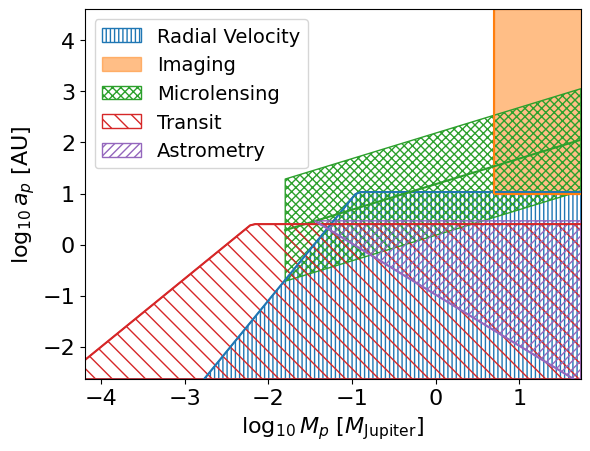

In [10]:
symbols = [".","^","x","*","s"]
for i,detection_method in enumerate(df["discoverymethod"].unique()):
    sub_df = df[df["discoverymethod"] == detection_method]
    pl_masses = sub_df["pl_bmassj"]
    pl_semi_major_axis = sub_df["pl_orbsmax"]

    plt.plot(np.log10(pl_masses), np.log10(pl_semi_major_axis), ls="None", marker=symbols[i], alpha=(1 if detection_method!="Transit" else 0.8), label=detection_method)

planets = [
    "Mercury", "Venus", "Earth", "Mars",
    "Jupiter", "Saturn", "Uranus", "Neptune"
]
masses_kg = [
    3.3011e23,
    4.8675e24,
    5.97237e24,
    6.4171e23,
    1.89813e27,
    5.6834e26,
    8.6810e25,
    1.02413e26
]
from astropy.constants import M_jup
masses_M_jup = (np.array(masses_kg)/M_jup).value
a_AU = [
    0.387098,
    0.723332,
    1.00000011,
    1.523679,
    5.20260,
    9.5549,
    19.2184,
    30.11
]
for i, planet in enumerate(planets):
    plt.plot(np.log10(masses_M_jup[i]), np.log10(a_AU[i]), marker="d", color="black", ls="None", label=(None if i!=0 else "Solar Sys. Planets"))
    plt.text(np.log10(masses_M_jup[i]), np.log10(a_AU[i]), planet, fontsize=14, fontweight="bold")

xlim = plt.xlim()
ylim = plt.ylim()
plt.legend(fontsize=13)
plt.close()

m_p_range = np.logspace(*xlim, 100)
def astrometry_limit(m_p):
    a_ps = (((M_sun/(m_p*M_jup)) * 10E-5*u.AU).to(u.AU)).value
    a_ps = np.where(a_ps < 2.924, a_ps, np.nan)
    return a_ps
def RV_limit(m_p):
    a_ps = ((((m_p*M_jup)/M_sun)**2 * 8.871E8*u.AU).to(u.AU)).value
    a_ps = np.where(a_ps < 10.70, a_ps, 10.70)
    return a_ps
def transit_limit(m_p):
    a_ps = ((((m_p*M_jup)/M_earth)**(4/3) * 1*u.AU).to(u.AU)).value
    a_ps = np.where(a_ps < 2.52, a_ps, 2.52)
    return a_ps
def microlensing_limit(m_p):
    a_ps = (((m_p)**(1/2) * 15.2627*u.AU).to(u.AU)).value
    a_ps = np.where(m_p > ((5*u.M_earth/u.M_jup).to(u.M_earth**0)).value, a_ps, np.nan)
    return a_ps

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
symbols = [".","^","x","*","s"]
for i,detection_method in enumerate(df["discoverymethod"].unique()):
    sub_df = df[df["discoverymethod"] == detection_method]
    if detection_method == "Imaging":
        plt.vlines(np.log10(5), np.log10(10), ylim[1], color=colors[i])
        plt.hlines(np.log10(10), np.log10(5), xlim[1], color=colors[i])
        plt.fill_between([np.log10(5), xlim[1]], np.log10(10), ylim[1], color=colors[i], alpha=0.5, label=detection_method)
    if detection_method =="Astrometry":
        plt.plot(np.log10(m_p_range), np.log10(astrometry_limit(m_p_range)), marker="None", ls="-", color=colors[i])
        plt.fill_between(np.log10(m_p_range), np.log10(astrometry_limit(m_p_range)), np.ones_like(m_p_range)*np.log10(2.924), facecolor="None", alpha=1, edgecolor=colors[i], label=detection_method, hatch="////")
    if detection_method =="Radial Velocity":
        plt.plot(np.log10(m_p_range), np.log10(RV_limit(m_p_range)), marker="None", ls="-", color=colors[i])
        plt.fill_between(np.log10(m_p_range), np.ones_like(m_p_range)*ylim[0], np.log10(RV_limit(m_p_range)), facecolor="None", alpha=1, edgecolor=colors[i], label=detection_method, hatch="||||")
    if detection_method =="Transit":
        plt.plot(np.log10(m_p_range), np.log10(transit_limit(m_p_range)), marker="None", ls="-", color=colors[i])
        plt.fill_between(np.log10(m_p_range), np.ones_like(m_p_range)*ylim[0], np.log10(transit_limit(m_p_range)), facecolor="None", alpha=1, edgecolor=colors[i], label=detection_method, hatch="\\\\")
    if detection_method =="Microlensing":
        plt.plot(np.log10(m_p_range), np.log10(microlensing_limit(m_p_range)), marker="None", ls="-", color=colors[i])
        plt.fill_between(np.log10(m_p_range), np.log10(microlensing_limit(m_p_range))-1, np.log10(microlensing_limit(m_p_range))+1, facecolor="None", alpha=1, edgecolor=colors[i], label=detection_method, hatch="xxxx")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(r"$\log_{10}M_p$ [$M_\mathrm{Jupiter}$]")
plt.ylabel(r"$\log_{10}a_p$ [AU]")
plt.legend(fontsize=14)
plt.show()


### i)

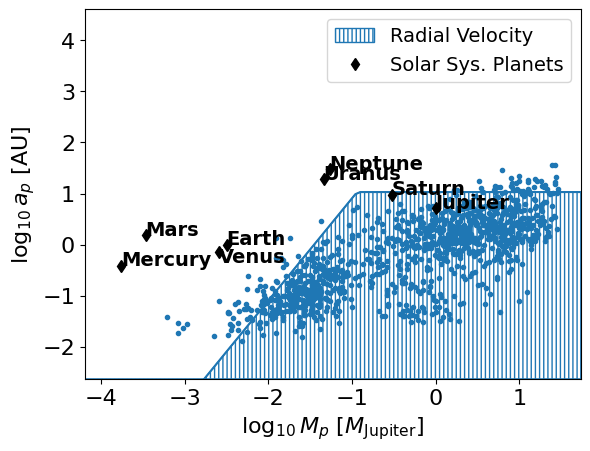

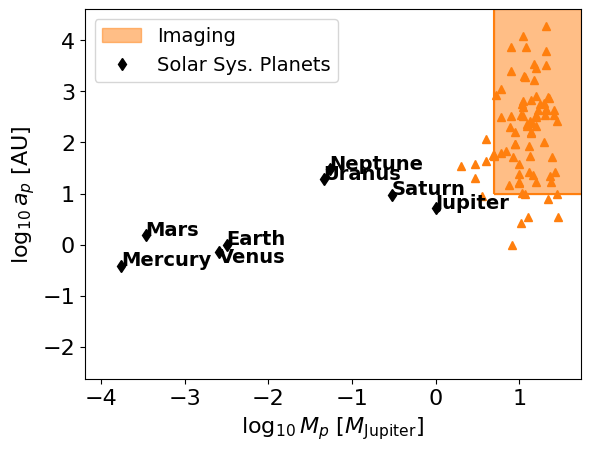

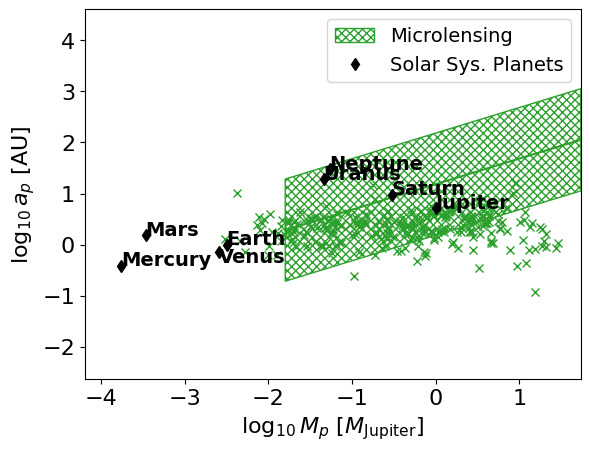

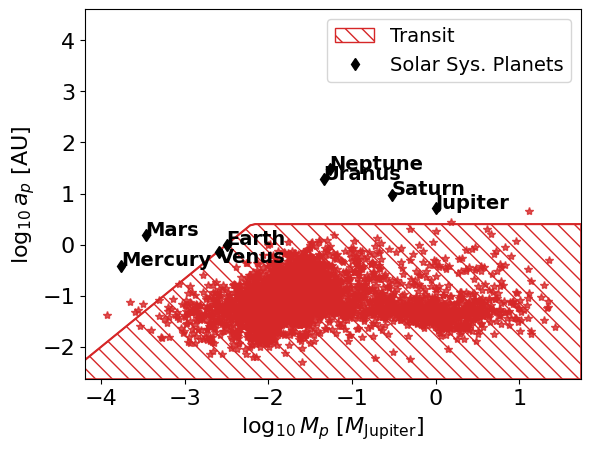

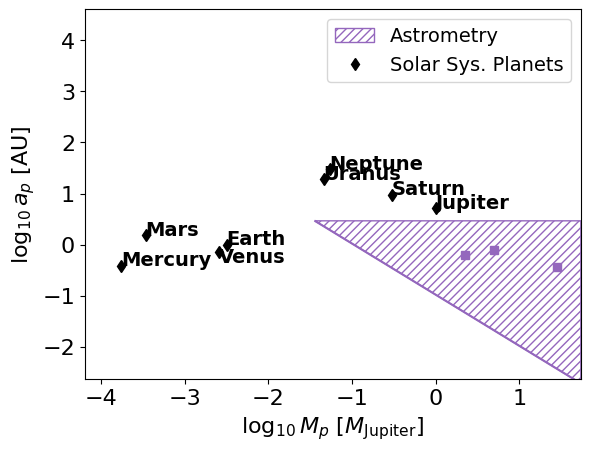

In [16]:
for i,detection_method in enumerate(df["discoverymethod"].unique()):
    sub_df = df[df["discoverymethod"] == detection_method]
    
    if detection_method == "Imaging":
        plt.vlines(np.log10(5), np.log10(10), ylim[1], color=colors[i])
        plt.hlines(np.log10(10), np.log10(5), xlim[1], color=colors[i])
        plt.fill_between([np.log10(5), xlim[1]], np.log10(10), ylim[1], color=colors[i], alpha=0.5, label=detection_method)
    if detection_method =="Astrometry":
        plt.plot(np.log10(m_p_range), np.log10(astrometry_limit(m_p_range)), marker="None", ls="-", color=colors[i])
        plt.fill_between(np.log10(m_p_range), np.log10(astrometry_limit(m_p_range)), np.ones_like(m_p_range)*np.log10(2.924), facecolor="None", alpha=1, edgecolor=colors[i], label=detection_method, hatch="////")
    if detection_method =="Radial Velocity":
        plt.plot(np.log10(m_p_range), np.log10(RV_limit(m_p_range)), marker="None", ls="-", color=colors[i])
        plt.fill_between(np.log10(m_p_range), np.ones_like(m_p_range)*ylim[0], np.log10(RV_limit(m_p_range)), facecolor="None", alpha=1, edgecolor=colors[i], label=detection_method, hatch="||||")
    if detection_method =="Transit":
        plt.plot(np.log10(m_p_range), np.log10(transit_limit(m_p_range)), marker="None", ls="-", color=colors[i])
        plt.fill_between(np.log10(m_p_range), np.ones_like(m_p_range)*ylim[0], np.log10(transit_limit(m_p_range)), facecolor="None", alpha=1, edgecolor=colors[i], label=detection_method, hatch="\\\\")
    if detection_method =="Microlensing":
        plt.plot(np.log10(m_p_range), np.log10(microlensing_limit(m_p_range)), marker="None", ls="-", color=colors[i])
        plt.fill_between(np.log10(m_p_range), np.log10(microlensing_limit(m_p_range))-1, np.log10(microlensing_limit(m_p_range))+1, facecolor="None", alpha=1, edgecolor=colors[i], label=detection_method, hatch="xxxx")
    sub_df = df[df["discoverymethod"] == detection_method]
    pl_masses = sub_df["pl_bmassj"]
    pl_semi_major_axis = sub_df["pl_orbsmax"]

    plt.plot(np.log10(pl_masses), np.log10(pl_semi_major_axis), ls="None", marker=symbols[i], color=colors[i], alpha=(1 if detection_method!="Transit" else 0.8))

    for i, planet in enumerate(planets):
        plt.plot(np.log10(masses_M_jup[i]), np.log10(a_AU[i]), marker="d", color="black", ls="None", label=(None if i!=0 else "Solar Sys. Planets"))
        plt.text(np.log10(masses_M_jup[i]), np.log10(a_AU[i])+(0 if planet!="Venus" else -0.2), planet, fontsize=14, fontweight="bold")

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(r"$\log_{10}M_p$ [$M_\mathrm{Jupiter}$]")
    plt.ylabel(r"$\log_{10}a_p$ [AU]")
    plt.legend(fontsize=14)
    plt.show()

### j)
From making these comparisons, it is clear to me that direct imaging (and microlensing, but less importantly) is exploring a very different parameter space than the other methods. I also see that the two most popular methods (transit and RV) are very biased towards high-mass and close planets, leading to an overabundance of hot Jupiters. Also, microlensing is the only method capable of currently identifying Neptune and Uranus, but longer monitoring would enable methods like astrometry, RV, and transit to detect them.

The most noticeable thing I saw in these plots is that absolutely no method is able to detect smaller planets like Mars and Mercury, even with longer coverage. The only way to detect them with these methods would be to wait until we have better instruments that can achieve a better spatial resolution or a better SNR limit.

## 2.

I first download the two tables of candidate planets and stars and figure out how to open them as pandas tables.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.units as u
from astropy.constants import M_jup, M_sun, G
import pandas as pd

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
plt.rc("axes", labelsize=16) 

In [236]:
with open(r"/Users/ogilbert/Downloads/nph-nstedAPI.txt", "r") as f:
    header_line = [line.rstrip("\n") for i, line in enumerate(f) if i==204][0]
pipe_positions = [pos for pos, ch in enumerate(header_line) if ch == "|"]
colspecs = [(pipe_positions[i] + 1, pipe_positions[i+1]) for i in range(len(pipe_positions)-1)]
col_names = [header_line[start:end].strip() for start, end in colspecs]
col_names = [col_names[i] for i in range(len(col_names)) if col_names[i]!=""]
stars_cat = pd.read_fwf(r"/Users/ogilbert/Downloads/nph-nstedAPI.txt", skiprows=208, header=None, colspecs=colspecs, names=col_names)

planets_cat = pd.read_csv(r"cumulative_2025.12.05_12.54.16.csv", comment="#")
print(planets_cat)

         kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0     10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1     10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2     10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3     10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4     10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
...        ...        ...           ...             ...              ...   
9559  10090151  K07985.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9560  10128825  K07986.01           NaN       CANDIDATE        CANDIDATE   
9561  10147276  K07987.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9562  10155286  K07988.01           NaN       CANDIDATE        CANDIDATE   
9563  10156110  K07989.01           NaN  FALSE POSITIVE   FALSE POSITIVE   

      koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       

Based on Howard et al. (2012), we perform cuts on both datasets to remove bad entries.

I decide to remove planet candidates that were identified as false positives, because they might have been considered previously, but since they are now confirmed to be wrong, we do not want to include them in our plots.

For quality cuts, I also only keep planets with short periods ($P<50$ days) and stars with $4100\mathrm{K}<T_\mathrm{eff}<6100\mathrm{K}$, $\log g \in [4.0,4.9]$, and $k_\mathrm{mag}<15$.

In [237]:

planets_cat = planets_cat[planets_cat["koi_pdisposition"].isin(["CONFIRMED","CANDIDATE"])] # Remove false positives
planets_cat = planets_cat[planets_cat["koi_period"] < 50] # Remove long-period planets

stars_cat = stars_cat[(stars_cat["teff"] > 4100) & (stars_cat["teff"] < 6100)] # effective temperature cut
stars_cat = stars_cat[(stars_cat["logg"] > 4.0) & (stars_cat["logg"] < 4.9)] # surface gravity cut
stars_cat = stars_cat[(stars_cat["kmag"] <15)] # Kepler magnitude cut

print(len(planets_cat))
print(len(stars_cat))

3635
106269


We will also make cuts on signal to noise ratio to calculate $f_\mathrm{cell}$.

$$f_\mathrm{cell} = \sum^{n_\mathrm{pl,cell}}_{j=1} \frac{1/p_j}{n_{\star,j}}$$
Where we sum over each planet in the cell. $p_j=(R_\star/a)_j$. $n_{\star,j}$ is the number of possible stars that could have been detected for the SNR of this detection. 

$$\mathrm{SNR} \approx \sigma_\mathrm{phot}^{-1}\sqrt{\frac{N}{\pi}} a_p^{-1/2}R_s^{-3/2}R_p^2$$

$$\mathrm{SNR} \approx \sigma_\mathrm{phot}^{-1}\sqrt{\frac{N}{\pi}} a_p^{-1/2}R_s^{-3/2}R_p^2$$
$\sigma_\mathrm{phot}^{-1}\sqrt{\frac{N}{\pi}}$ is an unknown constant, but we can find it since we have the SNR of the detection for each planet and all the other information. We can therefore find that constant, let's name it $K$, and then we can find the upper limit on the stellar radius/mass by using the same SNR detection limit of 10 in the paper.
$$10 > K a_p^{-1/2}R_s^{-3/2}R_p^2$$

$$10K^{-1} a_p^{1/2}R_p^{-2} > R_s^{-3/2}$$
$$R_s < \left(10K^{-1} a_p^{1/2}R_p^{-2}\right)^{-2/3}$$
Where the left of the equation is known, and the right is our constraint. We find $n_{\star,j}$ by selecting all stars in our stars catalog that satisfy this criterion.

We plot the sample of planets we are using on a radius vs period plot:

In [ ]:
xbins = 2*5**np.linspace(-2/3, 2, 9)
ybins = 2**np.linspace(0, 5, 11)
counts = np.zeros((len(ybins)-1,len(xbins)-1))
f_cell_grid = np.empty((len(ybins)-1,len(xbins)-1))
for x in range(len(xbins)-1):
    for y in range(len(ybins)-1):
        f_cell = 0
        sub_cat = planets_cat[((planets_cat["koi_prad"] > ybins[y]) & (planets_cat["koi_prad"] < ybins[y+1])) & ((planets_cat["koi_period"] > xbins[x]) & (planets_cat["koi_period"] < xbins[x+1]))]
        for j in range(len(sub_cat)):
            P = sub_cat["koi_period"].values[j]
            R_star = sub_cat["koi_srad"].values[j]*u.R_sun
            R_p = sub_cat["koi_prad"].values[j]*u.R_earth
            a_p = sub_cat["koi_sma"].values[j]*u.AU
            R_p_sun = R_p.to(u.R_sun)
            a_p_sun = a_p.to(u.R_sun)
            p_j = (R_star / a_p_sun).decompose().value
            SNR = sub_cat["koi_model_snr"].values[j]
            K = SNR / (a_p_sun**(-1/2) * R_star**(-3/2) * R_p_sun**2)
            R_s_upper_limit = (10 / K * a_p_sun**0.5 * R_p_sun**-2)**(-2/3)
            R_s_upper_limit = R_s_upper_limit.to(u.R_sun)
            sub_star_df = stars_cat[stars_cat["radius"]*u.R_sun < R_s_upper_limit]
            if not np.isnan(R_s_upper_limit.value):
                f_cell += (1/p_j)/len(sub_star_df)
        f_cell_grid[y,x] = f_cell
        counts[y,x] = len(sub_cat)
        pass
counts = np.where(counts>0, counts, np.nan)


/var/folders/bq/dl39th_j0f71bgv_rs5frsgm0000gq/T/ipykernel_93676/4046873297.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  f_cell += (1/p_j)/len(sub_star_df)


[[5.92815580e-03 3.08697817e-03 1.70664527e-02 2.07363938e-01
             nan 1.13883827e-01            nan            nan]
 [1.09636414e-03 3.59693607e-03 2.43191516e-01 7.67260416e-02
  6.92726823e-02 5.68010824e-02 1.02421178e-01 3.21826904e-01]
 [7.56907389e-05 8.49032564e-04 2.74181069e-03 9.99783408e-03
             nan 5.59927207e-02 5.95654951e-02 6.97073702e-02]
 [7.32410193e-05 1.59480414e-04 9.83285883e-04 4.00024451e-03
  9.52842758e-03 1.86428481e-02 2.41488155e-02 5.21201536e-02]
 [1.54876687e-05 1.54615187e-04 3.43311671e-04 1.46870954e-03
  1.52032260e-02 1.63384426e-01 5.90336825e-03 9.20623563e-03]
 [4.60975995e-05 4.28268464e-03 3.78007174e-04 1.38332267e-03
  6.61116543e-02 1.80423949e-03            nan 4.17760655e-03]
 [4.33832013e-05 3.59300280e-04 5.48325082e-04 3.97105651e-01
  1.62688411e-03 1.58594055e-03            nan 3.80107312e-03]
 [4.53687875e-05 2.09584506e-04 8.65827110e-04 1.00581970e-03
  7.66372096e-04 6.64615846e-04 2.67255682e-03 1.61239409e-01]


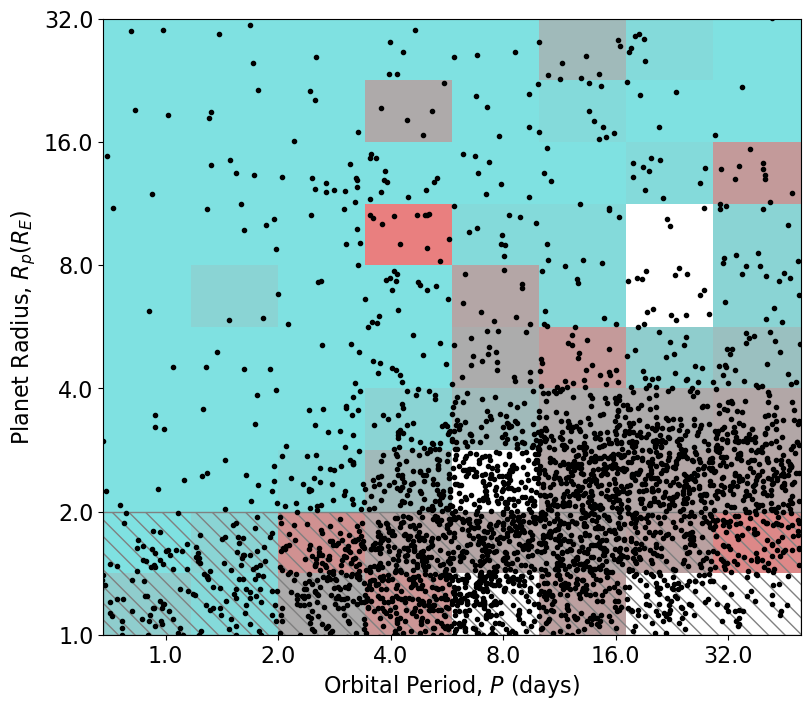

In [324]:
#f_cell_grid = np.where(f_cell_grid != np.inf, f_cell_grid, np.nan)
#f_cell_grid = np.where(f_cell_grid != 0, f_cell_grid, np.nan)
f_cell_grid = np.where(f_cell_grid < 1, f_cell_grid, np.nan)
print(f_cell_grid)
from matplotlib.colors import LinearSegmentedColormap
colors = [(0.0, "#00C4C4"),(0.032, "#5A5A5A"),(1.0, "#D40000")]
paper_cmap = LinearSegmentedColormap.from_list("teal_gray_red", colors)
plt.figure(figsize=(9,8))
ax = plt.gca()
weird = planets_cat[planets_cat["koi_prad"] > 10000].copy()
pcm = ax.pcolormesh(xbins, ybins, f_cell_grid, shading="auto", cmap=paper_cmap, alpha=0.5)
plt.plot(planets_cat["koi_period"], planets_cat["koi_prad"], marker=".", ls="None", color="black")
plt.fill_between([0.68,50], [1,1], [2,2], facecolor="None", alpha=1, edgecolor="gray", hatch="\\\\")
plt.xscale("log", base=2)
plt.yscale("log", base=2)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
plt.xlim(0.68,50)
plt.ylim(1,32)
plt.xlabel("Orbital Period, $P$ (days)")
plt.ylabel("Planet Radius, $R_p(R_E)$")
ax.ticklabel_format(style='plain')

We can see this plot is pretty similar to the one from the paper, but we have way more exoplanet detections now.

### b)

Figure 5

[ 1.          1.41421356  2.          2.82842712  4.          5.65685425
  8.         11.3137085  16.         22.627417   32.        ]
(10,)


(0.0, 1.0)

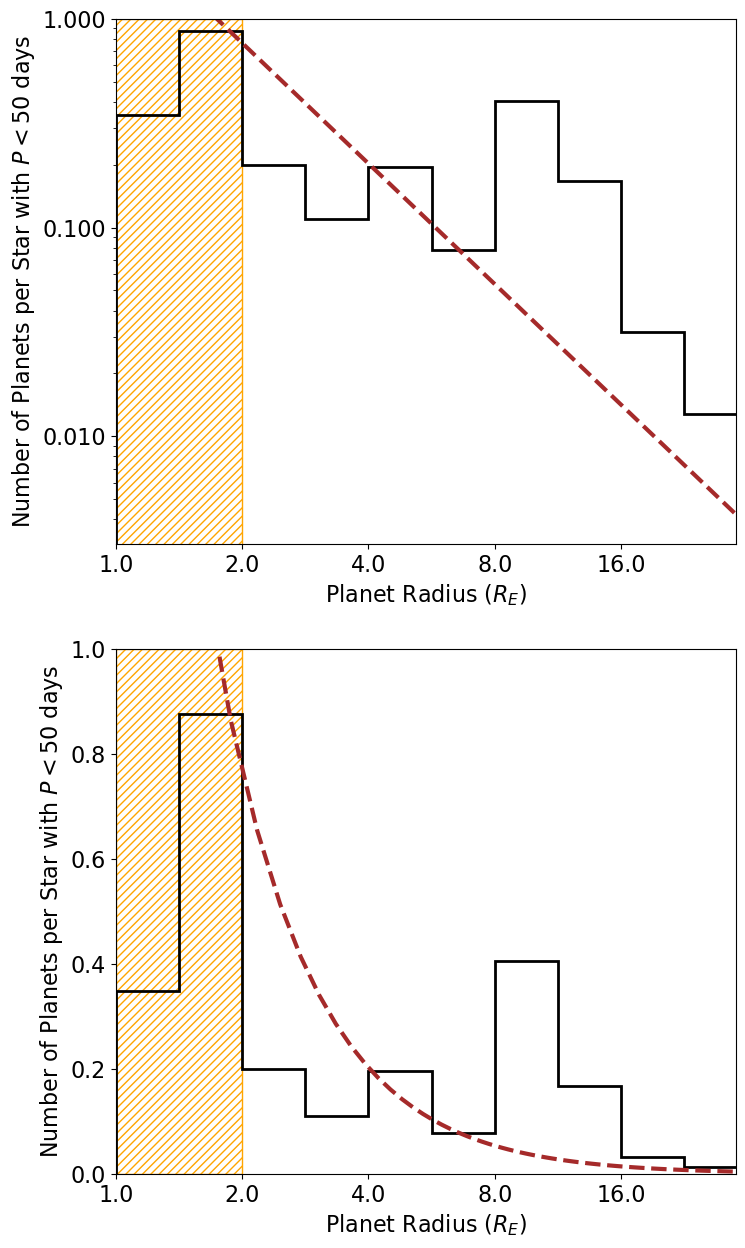

In [368]:
rfit = np.linspace(1,30,100)
funct = lambda R, kR, alpha: kR*R**alpha
plt.figure(figsize=(8,15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1)
print(ybins)
occ_rate = np.nansum(f_cell_grid, axis=1)
print(occ_rate.shape)
p_rads = (ybins[:-1] + ybins[1:])/(2)
ax1.fill_between([plt.xlim()[0],2], *plt.ylim(), facecolor="None", alpha=1, edgecolor="orange", hatch="////")
ax1.stairs(occ_rate, ybins, color="black", lw=2)
ax1.plot(rfit, funct(rfit, 2.9,-1.92), color="brown", ls="--", lw=3)
ax1.set_xscale("log", base=2)
ax1.set_yscale("log", base=10)
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax1.set_xlabel("Planet Radius $(R_E)$")
ax1.set_ylabel("Number of Planets per Star with $P<50$ days")
ax1.set_xlim(1,30)
ax1.set_ylim(top=1)


ax2.fill_between([plt.xlim()[0],2], *plt.ylim(), facecolor="None", alpha=1, edgecolor="orange", hatch="////")
ax2.stairs(occ_rate, ybins, color="black", lw=2)
ax2.plot(rfit, funct(rfit, 2.9,-1.92), color="brown", ls="--", lw=3)
ax2.set_xscale("log", base=2)
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax2.set_xlabel("Planet Radius $(R_E)$")
ax2.set_ylabel("Number of Planets per Star with $P<50$ days")
ax2.set_xlim(1,30)
ax2.set_ylim(top=1)

Figure 6

(0.68, 50)

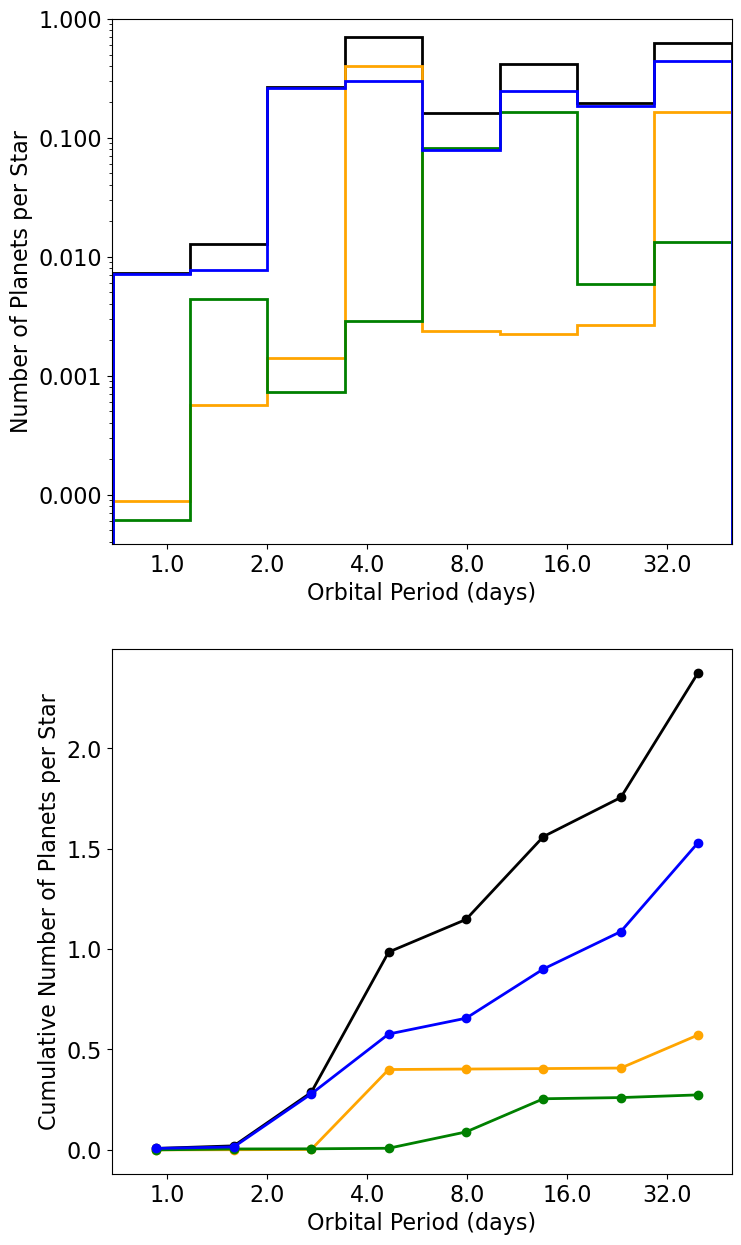

In [305]:
plt.figure(figsize=(8,15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1)
for rs in range(4):
    if rs == 0:
        occ_rate = np.nansum(f_cell_grid[:-2], axis=0)
    elif rs == 1:
        occ_rate = np.nansum(f_cell_grid[-4:-2], axis=0)
    elif rs == 2:
        occ_rate = np.nansum(f_cell_grid[-6:-4], axis=0)
    elif rs == 3:
        occ_rate = np.nansum(f_cell_grid[:-6], axis=0)
    ax1.stairs(occ_rate, xbins, color=["black","orange","green","blue"][rs], lw=2)
ax1.set_xscale("log", base=2)
ax1.set_yscale("log", base=10)
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax1.set_xlabel("Orbital Period (days)")
ax1.set_ylabel("Number of Planets per Star")
ax1.set_xlim(0.68,50)
ax1.set_ylim(top=1)

for rs in range(4):
    if rs == 0:
        occ_rate = np.nansum(f_cell_grid[:-2], axis=0)
    elif rs == 1:
        occ_rate = np.nansum(f_cell_grid[-4:-2], axis=0)
    elif rs == 2:
        occ_rate = np.nansum(f_cell_grid[-6:-4], axis=0)
    elif rs == 3:
        occ_rate = np.nansum(f_cell_grid[:-6], axis=0)
    cumulative_n = [np.sum(occ_rate[:i+1]) for i in range(len(occ_rate))]
    ax2.plot((xbins[1:]+xbins[:-1])/2, cumulative_n, color=["black","orange","green","blue"][rs], lw=2, marker="o", ls="-")
ax2.set_xscale("log", base=2)
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax2.set_xlabel("Orbital Period (days)")
ax2.set_ylabel("Cumulative Number of Planets per Star")
ax1.set_xlim(0.68,50)

Figure 7

(0.68, 50)

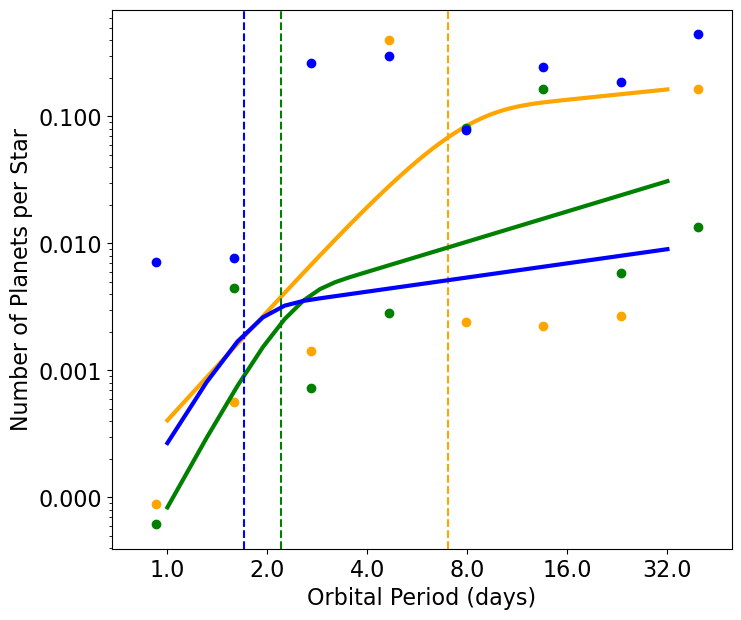

In [371]:
def powerlaw_cutoff(P, k_P, beta, P_0, gamma):
    return k_P*P**beta * (1-np.exp(-(P/P_0)**gamma))
from scipy.optimize import curve_fit
plt.figure(figsize=(8,7))
ax1 = plt.subplot(111)
paper_params =  [[0.035, 0.52, 4.8, 2.4],
                [0.064, 0.27, 7.0, 2.6],
                [0.0020, 0.79, 2.2, 4.0],
                [0.0025, 0.37, 1.7, 4.1],]
for rs in range(4):
    if rs == 0:
        occ_rate = np.nansum(f_cell_grid[:-2], axis=0)
    elif rs == 1:
        occ_rate = np.nansum(f_cell_grid[-4:-2], axis=0)
    elif rs == 2:
        occ_rate = np.nansum(f_cell_grid[-6:-4], axis=0)
    elif rs == 3:
        occ_rate = np.nansum(f_cell_grid[:-6], axis=0)
    if rs > 0:
        ax1.plot((xbins[1:]+xbins[:-1])/2, occ_rate, color=["black","orange","green","blue"][rs], lw=2, ls="None", marker="o")
        ylim_c = ax1.get_ylim()
        ax1.axvline(paper_params[rs][2], 0, 1, ls="--", color=["black","orange","green","blue"][rs])
        fit_P = np.linspace(min(ybins), max(ybins), 100)
        ax1.plot(fit_P, powerlaw_cutoff(fit_P, *(paper_params[rs])), ls="-", lw=3, color=["black","orange","green","blue"][rs], marker="None")

ax1.set_xscale("log", base=2)
ax1.set_yscale("log", base=10)
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax1.set_xlabel("Orbital Period (days)")
ax1.set_ylabel("Number of Planets per Star")
ax1.set_xlim(0.68,50)

Figure 8

In [325]:
with open(r"/Users/ogilbert/Downloads/nph-nstedAPI.txt", "r") as f:
    header_line = [line.rstrip("\n") for i, line in enumerate(f) if i==204][0]
pipe_positions = [pos for pos, ch in enumerate(header_line) if ch == "|"]
colspecs = [(pipe_positions[i] + 1, pipe_positions[i+1]) for i in range(len(pipe_positions)-1)]
col_names = [header_line[start:end].strip() for start, end in colspecs]
col_names = [col_names[i] for i in range(len(col_names)) if col_names[i]!=""]
stars_cat2 = pd.read_fwf(r"/Users/ogilbert/Downloads/nph-nstedAPI.txt", skiprows=208, header=None, colspecs=colspecs, names=col_names)
stars_cat2 = stars_cat2[(stars_cat2["teff"] > 3600) & (stars_cat2["teff"] < 7100)] # effective temperature cut
stars_cat2 = stars_cat2[(stars_cat2["logg"] > 4.0) & (stars_cat2["logg"] < 4.9)] # surface gravity cut
stars_cat2 = stars_cat2[(stars_cat2["kmag"] <15)] # Kepler magnitude cut

In [ ]:
xbins2 = np.linspace(3600, 7100, 8)
ybins2 = 2**np.linspace(0, 5, 11)
f_cell_grid2 = np.empty((len(ybins2)-1,len(xbins2)-1))
for x in range(len(xbins2)-1):
    for y in range(len(ybins2)-1):
        f_cell = 0
        sub_cat = planets_cat[((planets_cat["koi_prad"] > ybins2[y]) & (planets_cat["koi_prad"] < ybins2[y+1])) & ((planets_cat["koi_steff"] > xbins2[x]) & (planets_cat["koi_steff"] < xbins2[x+1]))]
        for j in range(len(sub_cat)):
            R_star = sub_cat["koi_srad"].values[j]*u.R_sun
            R_p = sub_cat["koi_prad"].values[j]*u.R_earth
            a_p = sub_cat["koi_sma"].values[j]*u.AU
            R_p_sun = R_p.to(u.R_sun)
            a_p_sun = a_p.to(u.R_sun)
            p_j = (R_star / a_p_sun).decompose().value
            SNR = sub_cat["koi_model_snr"].values[j]
            K = SNR / (a_p_sun**(-1/2) * R_star**(-3/2) * R_p_sun**2)
            R_s_upper_limit = (10 / K * a_p_sun**0.5 * R_p_sun**-2)**(-2/3)
            R_s_upper_limit = R_s_upper_limit.to(u.R_sun)
            sub_star_df = stars_cat2[stars_cat2["radius"]*u.R_sun < R_s_upper_limit]
            if not np.isnan(R_s_upper_limit.value):
                f_cell += (1/p_j)/len(sub_star_df)
        f_cell_grid2[y,x] = f_cell
        pass


/var/folders/bq/dl39th_j0f71bgv_rs5frsgm0000gq/T/ipykernel_93676/1693178280.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  f_cell += (1/p_j)/len(sub_star_df)


In [349]:
# Total stars per bin counts
tot_stars = []
for i in range(len(xbins2)-1):
    sub_star_df2 = stars_cat2[(stars_cat2["teff"] > xbins2[i]) & (stars_cat2["teff"] < xbins2[i+1])]
    tot_stars.append(len(sub_star_df2))

(0.0, 1.0)

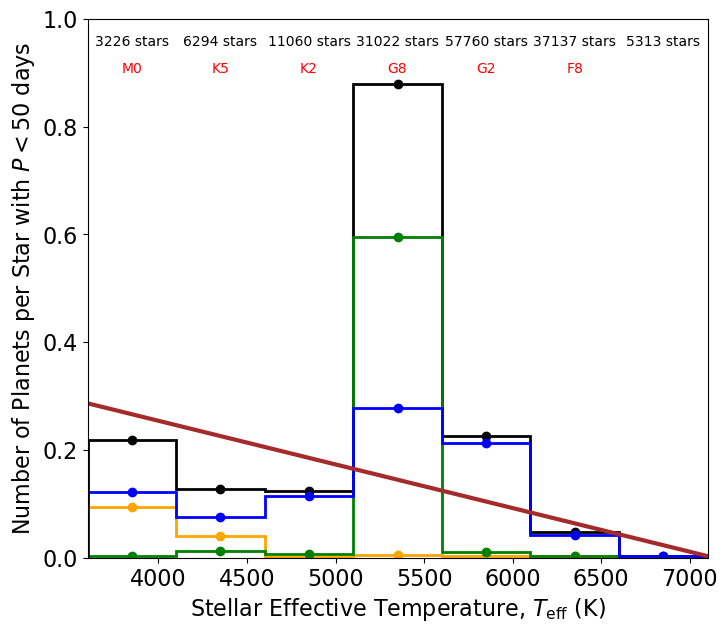

In [369]:

f_cell_grid2_ = np.where(f_cell_grid2 == np.inf, np.nan, f_cell_grid2)
plt.figure(figsize=(8,7))
ax1 = plt.subplot(111)
for rs in range(4):
    if rs == 0:
        occ_rate = np.nansum(f_cell_grid2_[:-2], axis=0)
    elif rs == 1:
        occ_rate = np.nansum(f_cell_grid2_[-4:-2], axis=0)
    elif rs == 2:
        occ_rate = np.nansum(f_cell_grid2_[-6:-4], axis=0)
    elif rs == 3:
        occ_rate = np.nansum(f_cell_grid2_[:-6], axis=0)
    ax1.stairs(occ_rate, xbins2, color=["black","orange","green","blue"][rs], lw=2)
    ax1.plot((xbins2[1:]+xbins2[:-1])/2, occ_rate, color=["black","orange","green","blue"][rs], ls="None", marker="o")
for i in range(len(xbins2)-1):
    ax1.text((xbins2[i]+xbins2[i+1])/2, 0.95, f"{tot_stars[i]} stars", color="black", ha="center")
    ax1.text((xbins2[i]+xbins2[i+1])/2, 0.9, ["M0","K5","K2","G8","G2","F8",""][i], color="red", ha="center")
func = lambda T, f0, kT: f0+kT*((T-5100)/1000)
ax1.plot([3600,7100], func(np.array([3600,7100]), 0.165,-0.081), color="brown", ls="-", lw=3, marker="None")
ax1.set_xlabel(r"Stellar Effective Temperature, $T_\mathrm{eff}$ (K)")
ax1.set_ylabel(r"Number of Planets per Star with $P<50$ days")
ax1.set_xlim(3600,7100)
ax1.set_ylim(0,1)

### c)

I obtain vastly different results compared to Howard et al. 2012, despite following their selection technique to calculate $f_\mathrm{cell}$ exactly, incorporating their SNR selection.

For the first plot of planet radius vs orbital period (figure 4), we can see that while I obtain a similar distribution to them, there are way more exoplanets that have been discovered since 2012. This could explain the fact that the distribution of $f_\mathrm{cell}$ changed when compared to theirs (i.e., the red cells are not so dominant anymore in the $R_p\in[2,4]R_E$ regime).

For the figure 5, I obtain very similar results, but for figure 6, I have really different results than Howard et al.

They have that $f(P)$ is dominated by the $R_p\in[2,4]R_E$, but this is only the case for $P\in[3.4,5.9]$ days for me. There is no real explanation for this change. The same behavior can be observed in the bottom plot of figure 6, where the cumulative number of planet distribution is way steeper.

Figure 7 also shows the same discrepant trend, as the data is the same than for figure 6, but we can clearly see the difference between Howard et al. and my results as I plotted their broken powerlaw trends over my results.

Finally, figure 8 is quite similar to theirs, except for a striking difference in the $T_\mathrm{eff}\in[5100,5600]\mathrm{K}$ bin, where $f(T_\mathrm{eff})$ is larger than their findings by a factor of $\sim4$. Once again, except a physical explanation that would make planets around G8-G5 stars way more prevalent than any other types, this must be due to some artefact in the data I analyzed. Other than this, the other bins seem to follow the linear trend found in Howard et al. 2012, and the number of stars in each bin shown at the top also follows the same trend as they find.